## Prediction of Brain Tumour (Meningioma) Grade Using MRI Radiomic Features and Machine Learning

- The aim of this project is to utilise machine learning to predict the grade of meningioma based on radiomics features.
- The radiomics features are extracted from pre-operative MRI scans (MRIs were collected from The Cancer Imaging Archive (TCIA), a publicly available dataset at https://www.cancerimagingarchive.net/collection/meningioma-seg-class/ under the restricted license agreement).
- The dataset comprises a cohort of 94 patients diagnosed with meningioma between 2010 and 2019. Grade I and Grade II meningiomas were identified according to the 2016 WHO classification guidelines, and Grade III cases were excluded due to their rare occurrence.

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#pda">Preliminary Data Analysis</a></li>
<li><a href="#data std">Data Standardization</a></li>
<li><a href="#feat_select">Feature Selection</a></li>
<li><a href="#model_train">Model Training and Evaluation</a></li>
<li><a href="#model_imp">Hyperparameter Tuning</a></li>
<li><a href="#model_reeval">Model Re-evaluation</a></li>
<li><a href="#model_comp">Comparing Models</a></li>
</ul>

<a id='intro'></a>

## Introduction

- Meningioma is the most common primary brain tumour, and, according to the World Health Organisation criteria, it can be classified as grade I, II or III. Grade I is benign, grade II is atypical, and grade III is anaplastic.
- This coursework aims to utilise machine learning to predict the grade of meningioma based on radiomics features.
- The column named "Target" specifies the meningioma grade. The remaining columns represent radiomics features extracted from the MRI scans.

<a id='pda'></a>

## Preliminary Data Analysis

In this section, we will carry out some exploratory analysis on the data such as correlational analysis, outlier detection and visualization of relationships.

In [1]:
# import required libraries

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read dataset
data = pd.read_csv("Dataset _01.csv")

# display the head of the dataset
data.head()

,Subjects,Grade,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
0,Meningioma-SEG-CLASS-001,1,-0.202380,1.000000,0.500000,0.781250,0.625000,0.035199,1.584963,3.000000,...,0.183386,0.222222,0.333336,7.258789,15.252757,16.975874,2.819105,3.283991,6.025921,0.009225
1,Meningioma-SEG-CLASS-002,1,0.078198,3.998177,0.644970,0.792388,0.591837,0.002975,2.521641,2.384615,...,0.412566,0.213018,0.655983,12.879417,42.543773,35.485714,3.372202,3.737664,10.480360,0.005394
2,Meningioma-SEG-CLASS-003,0,-1.122465,3.970686,0.749135,0.755102,0.745000,0.005018,1.548795,2.500000,...,0.580900,0.245556,0.600261,9.280669,31.384120,25.073600,3.179709,3.700225,7.322684,0.005692
3,Meningioma-SEG-CLASS-004,0,-0.559125,3.970544,0.537190,0.531250,0.820000,-0.029598,2.324863,2.800000,...,0.163532,0.225922,0.505917,9.889856,29.793151,27.326205,3.308140,3.773040,8.183365,0.005711
4,Meningioma-SEG-CLASS-005,0,-0.854174,1.000000,0.739645,0.501730,0.755102,0.003390,2.128085,3.250000,...,0.505990,0.242215,0.590278,11.860141,36.602601,23.996250,3.482922,3.825040,7.443554,0.004615


In [3]:
# check the number of features and samples

n_features = data.shape[1]
n_samples = data.shape[0]

print("no of features: ", n_features)
print("no of samples: ", n_samples)

no of features:  50
no of samples:  94


In [4]:
# exploring the data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 50 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Subjects                                                94 non-null     object 
 1   Grade                                                   94 non-null     int64  
 2   original_firstorder_Skewness_t1c                        94 non-null     float64
 3   original_glrlm_HighGrayLevelRunEmphasis_t1c             94 non-null     float64
 4   wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64
 5   wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64
 6   wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64
 7   wavelet-HLH_firstorder_Mean_t1c                         94 non-null     float64
 8   wavelet-HLH_glszm_ZoneEntropy_t1c         

There is no missing value in the dataset

In [5]:
# descriptive statistics of the data

data.describe()

,Grade,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,wavelet-HHH_firstorder_Skewness_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.436170,-0.243500,2.899225,0.635435,0.623576,0.632099,0.002783,2.236178,2.489702,-0.065559,...,0.356015,0.232594,5.356573e-01,9.128278,29.574805,25.864903,3.188343,3.578411,7.785921,0.006517
std,0.498568,0.768804,1.438076,0.115019,0.107621,0.103743,0.007713,0.622811,0.411192,0.123249,...,0.218767,0.020321,1.701179e-01,2.654790,8.857305,7.693632,0.211179,0.216781,2.047935,0.001778
min,0.000000,-2.052332,1.000000,0.500000,0.500000,0.500000,-0.029598,1.000000,1.500000,-0.449264,...,0.090007,0.160000,7.650000e-08,2.404321,9.727375,11.357795,2.469126,2.652987,3.624379,0.004615
25%,0.000000,-0.774200,1.000000,0.535693,0.531336,0.537190,0.000156,1.849679,2.206818,-0.118660,...,0.148213,0.222222,4.542996e-01,7.289214,22.739840,20.538101,3.042866,3.472482,6.271558,0.005493
50%,0.000000,-0.243948,3.972175,0.618594,0.603306,0.623032,0.001359,2.250101,2.500000,-0.049542,...,0.345379,0.240000,5.874852e-01,9.458491,31.323187,25.725575,3.247389,3.613757,7.618922,0.005912
75%,1.000000,0.178430,3.994126,0.719002,0.702479,0.708371,0.003247,2.571382,2.795946,0.001109,...,0.498012,0.248106,6.493523e-01,10.430441,34.985642,30.404355,3.340362,3.722113,9.105742,0.006939
max,1.000000,2.244620,3.999413,0.950033,0.905000,0.871581,0.037356,4.478859,3.500000,0.335625,...,1.000336,0.250000,7.897026e-01,15.224847,51.529881,48.882039,3.504120,3.973320,13.499614,0.016829


In [6]:
# count the number of subjects that belong to each grade of meningioma

data['Grade'].value_counts()

Grade
0    53
1    41
Name: count, dtype: int64

There are 53 subjects having Grade I meningioma and 41 have Grade II megingioma

### Correlational Analysis

The features of the dataset are all numeric. Therefore, we will explore the relationship between the features using correlation

In [7]:
# obtain the correlation coefficients between the features
cols = [col for col in data.columns[2:]]
data[cols].corr()

,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,wavelet-HHH_firstorder_Skewness_t1c,wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
original_firstorder_Skewness_t1c,1.000000,0.211489,0.112943,-0.072567,-0.276695,0.150245,0.280771,0.196099,-0.206476,-0.053546,...,0.077168,0.145626,0.150043,0.119835,0.237421,0.230052,0.122240,0.159656,0.109079,-0.164471
original_glrlm_HighGrayLevelRunEmphasis_t1c,0.211489,1.000000,0.139155,-0.115714,-0.164159,-0.056259,0.358841,0.121484,-0.228176,-0.205651,...,0.395715,0.309420,0.443348,0.471855,0.521953,0.481178,0.475476,0.429065,0.409363,-0.346960
wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,0.112943,0.139155,1.000000,0.162630,0.263790,0.002642,0.023234,0.048029,-0.183554,-0.103324,...,-0.145834,0.040758,0.184793,0.325549,0.369477,0.335667,0.282130,0.316519,0.318699,-0.359374
wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,-0.072567,-0.115714,0.162630,1.000000,0.302880,0.073928,-0.073958,-0.044713,-0.084631,0.123147,...,-0.041413,-0.150713,0.004717,0.163675,0.159412,0.222024,0.021612,0.079937,0.249254,-0.096834
wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,-0.276695,-0.164159,0.263790,0.302880,1.000000,-0.057535,-0.242465,-0.169671,0.029284,0.051716,...,-0.142362,-0.190389,-0.093036,-0.015472,-0.054385,0.002288,-0.096779,-0.003689,0.025091,-0.004710
wavelet-HLH_firstorder_Mean_t1c,0.150245,-0.056259,0.002642,0.073928,-0.057535,1.000000,-0.014356,0.109832,-0.145696,0.013524,...,-0.081476,-0.072579,-0.006804,0.004162,-0.081551,-0.048458,-0.098252,-0.047887,0.033396,0.097140
wavelet-HLH_glszm_ZoneEntropy_t1c,0.280771,0.358841,0.023234,-0.073958,-0.242465,-0.014356,1.000000,0.104895,-0.241279,-0.337620,...,0.344453,0.027864,0.210561,0.201118,0.300475,0.300633,0.261004,0.270202,0.204791,-0.248404
wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,0.196099,0.121484,0.048029,-0.044713,-0.169671,0.109832,0.104895,1.000000,-0.112098,-0.107328,...,0.046928,0.039568,0.036602,0.145187,0.158337,0.139574,0.134807,0.126384,0.134351,-0.063574
wavelet-HHH_firstorder_Skewness_t1c,-0.206476,-0.228176,-0.183554,-0.084631,0.029284,-0.145696,-0.241279,-0.112098,1.000000,0.186620,...,0.016320,0.014542,-0.306356,-0.385764,-0.395265,-0.360265,-0.373706,-0.470927,-0.379744,0.431541
wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c,-0.053546,-0.205651,-0.103324,0.123147,0.051716,0.013524,-0.337620,-0.107328,0.186620,1.000000,...,-0.041322,-0.129337,-0.122974,-0.098398,-0.060401,-0.101507,-0.125139,-0.124710,-0.136103,-0.009542


As seen from the output above, some of the features shows a significance positive or negative correlation.

Let's obtain the top positive and negative related features. Due to the large features of the dataset, we will only return the top 10 positive and negative related features

In [8]:
## Positive correlation

corr_feat = data[cols].corr() # get the correlation coefficients of all the features
corr_feat = corr_feat.unstack().sort_values(ascending=False) # unstack the dataframe and sort values in descending order
pos_corr_feat = corr_feat.drop_duplicates() # drop duplicates to exclude the same feature correlation
pos_corr_feat.head(11)

original_firstorder_Skewness_t1c                       original_firstorder_Skewness_t1c               1.000000
original_glcm_JointAverage_t2f                         original_glcm_Autocorrelation_t2f              1.000000
original_glcm_Autocorrelation_t2f                      original_gldm_HighGrayLevelEmphasis_t2f        1.000000
original_gldm_HighGrayLevelEmphasis_t2f                original_glcm_JointAverage_t2f                 1.000000
original_gldm_LowGrayLevelEmphasis_t2f                 original_glrlm_LowGrayLevelRunEmphasis_t2f     0.999930
original_glcm_Autocorrelation_t1c                      original_glrlm_HighGrayLevelRunEmphasis_t1c    0.999746
original_gldm_LowGrayLevelEmphasis_t1c                 original_glrlm_LowGrayLevelRunEmphasis_t1c     0.999688
wavelet-LLL_firstorder_Skewness_t1c                    original_firstorder_Skewness_t1c               0.988326
wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f      wavelet-HLL_glrlm_RunVariance_t2f              0.983059
o

The 10 most positive correlated features are displayed above. Let's visualize the relationships using scatterplot with a regression line

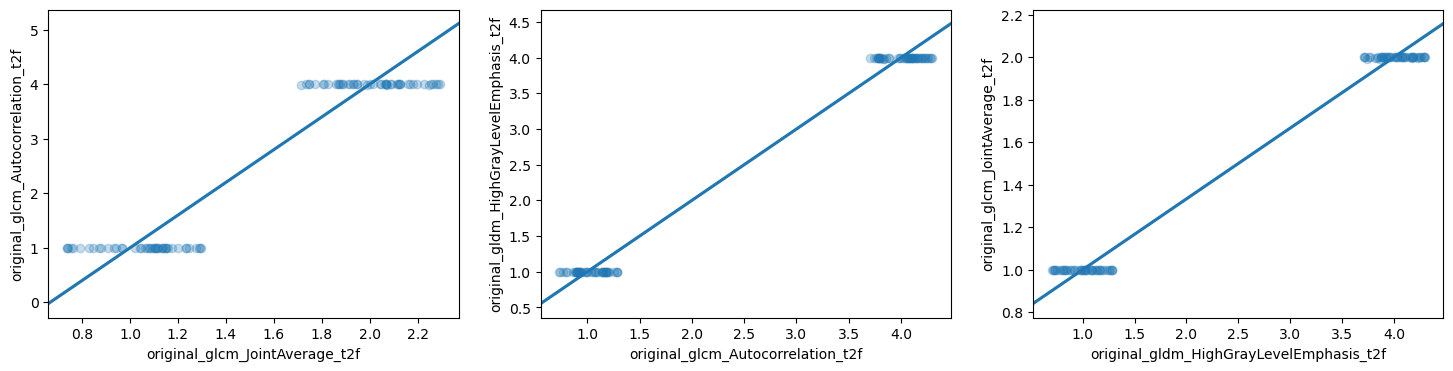

In [9]:
# relationship between positively related features.. jitter and transparency applied

plt.figure(figsize=[18, 4])

plt.subplot(1, 3, 1)
sns.regplot(data = data, x = 'original_glcm_JointAverage_t2f', y = 'original_glcm_Autocorrelation_t2f',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})

plt.subplot(1, 3, 2)
sns.regplot(data = data, x = 'original_glcm_Autocorrelation_t2f', y = 'original_gldm_HighGrayLevelEmphasis_t2f',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})

plt.subplot(1, 3, 3)
sns.regplot(data = data, x = 'original_gldm_HighGrayLevelEmphasis_t2f', y = 'original_glcm_JointAverage_t2f',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4});

Not much insights can be explained by the scatterplots of the relationship. However, it was evident that at higher value of features on x-axis in each of the plot, there is higher value of features on y-axis. This explained the linear positive relationship between the features. 

For example as seen in the first plot above, at small values of **"original_glcm_Autocorrelation_t2f"**, there were also low values of **"original_glcm_JointAverage_t2f"** and vice versa. 

In [10]:
## Negative correlation

corr_feat = data[cols].corr() # get the correlation coefficients of all the features
neg_corr_feat = corr_feat.unstack().sort_values() # unstack the correlation dataframe and sort values in ascending order
neg_corr_feat = neg_corr_feat.drop_duplicates() # drop duplicates to exclude the same feature correlation
neg_corr_feat.head(11)

original_glszm_HighGrayLevelZoneEmphasis_t2f  original_glszm_LowGrayLevelZoneEmphasis_t2f   -1.000000
original_glrlm_HighGrayLevelRunEmphasis_t1c   original_glrlm_LowGrayLevelRunEmphasis_t1c    -1.000000
original_gldm_LowGrayLevelEmphasis_t2f        original_gldm_HighGrayLevelEmphasis_t2f       -1.000000
original_glcm_Autocorrelation_t2f             original_gldm_LowGrayLevelEmphasis_t2f        -1.000000
original_glcm_JointAverage_t2f                original_gldm_LowGrayLevelEmphasis_t2f        -1.000000
original_gldm_LowGrayLevelEmphasis_t1c        original_glcm_Autocorrelation_t1c             -0.999996
original_glrlm_LowGrayLevelRunEmphasis_t2f    original_glcm_Autocorrelation_t2f             -0.999931
original_gldm_HighGrayLevelEmphasis_t2f       original_glrlm_LowGrayLevelRunEmphasis_t2f    -0.999930
original_glcm_JointAverage_t2f                original_glrlm_LowGrayLevelRunEmphasis_t2f    -0.999928
original_glcm_Autocorrelation_t1c             original_glrlm_LowGrayLevelRunEmphas

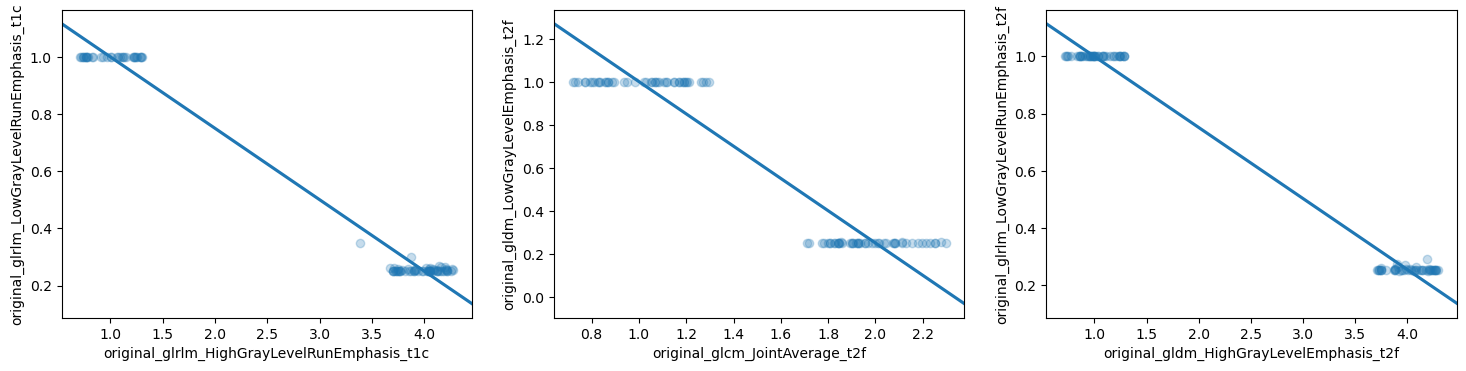

In [11]:
# relationship between negatively related features.. jitter and transparency applied

plt.figure(figsize=[18, 4])

plt.subplot(1, 3, 1)
sns.regplot(data = data, x = 'original_glrlm_HighGrayLevelRunEmphasis_t1c', y = 'original_glrlm_LowGrayLevelRunEmphasis_t1c',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})

plt.subplot(1, 3, 2)
sns.regplot(data = data, x = 'original_glcm_JointAverage_t2f', y = 'original_gldm_LowGrayLevelEmphasis_t2f',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})

plt.subplot(1, 3, 3)
sns.regplot(data = data, x = 'original_gldm_HighGrayLevelEmphasis_t2f', y = 'original_glrlm_LowGrayLevelRunEmphasis_t2f',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4});

In contrast to what was observed in positive related features, negatively related features show a downward trend i.e. at higher value of feature on y-axis, feature on x-axis have lower values and vice versa. 

For example, **original_gldm_HighGrayLevelEmphasis_t2f** in the third plot above have higher values as **original_glrlm_LowGrayLevelRunEmphasis_t2f** values become smaller.

### Data Visualization

In this section, we will visualize some of the features to explore the variation in the two groups of meningioma. For this, we will use boxplot to compare the mean of some of the features for the two groups.

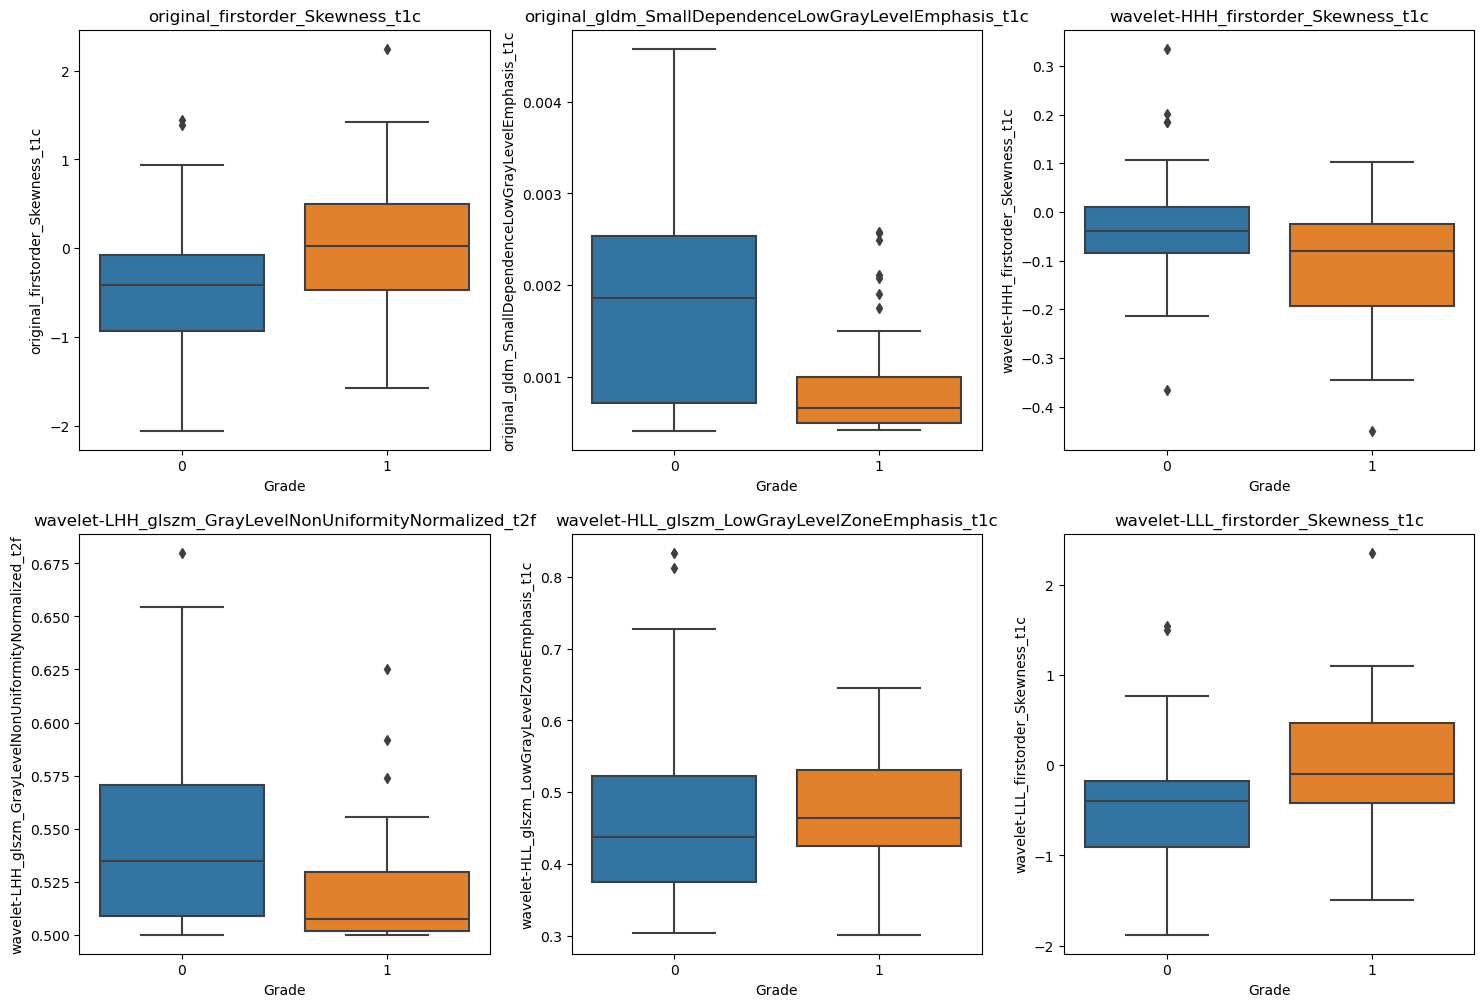

In [12]:
# set figure for the plots
plt.figure(figsize=[18, 12])

plt.subplot(2, 3, 1)
sns.boxplot(data = data, x = "Grade", y = 'original_firstorder_Skewness_t1c')
plt.title("original_firstorder_Skewness_t1c")

plt.subplot(2, 3, 2)
sns.boxplot(data = data, x = "Grade", y = 'original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c')
plt.title("original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c")

plt.subplot(2, 3, 3)
sns.boxplot(data = data, x = "Grade", y = 'wavelet-HHH_firstorder_Skewness_t1c')
plt.title("wavelet-HHH_firstorder_Skewness_t1c")

plt.subplot(2, 3, 4)
sns.boxplot(data = data, x = "Grade", y = 'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f')
plt.title("wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f")

plt.subplot(2, 3, 5)
sns.boxplot(data = data, x = "Grade", y = 'wavelet-HLL_glszm_LowGrayLevelZoneEmphasis_t1c')
plt.title("wavelet-HLL_glszm_LowGrayLevelZoneEmphasis_t1c")

plt.subplot(2, 3,6)
sns.boxplot(data = data, x = "Grade", y = 'wavelet-LLL_firstorder_Skewness_t1c')
plt.title("wavelet-LLL_firstorder_Skewness_t1c");

The mean value of the features visualized are observed to be different between the two groups. For example, as seen in the first subplot of the plot above, subjects with meningioma status 0 (Grade I) were observed to have a lower mean value for **original_firstorder_Skewness_t1c** as compared to those with meningioma status 1 (Grade II). In contrast, subjects with grade 0 (Grade I meningioma) were observed to have a higher mean value for **wavelet-HHH_firstorder_Skewness_t1c** than subjects with grade 1 (Grade II meningioma).

### Outlier Detection

From the boxplots generated above, it can be observed that there are outliers in the dataset. To remove the outliers, we will be using IQR (Inter Quartile Range) approach to finding the outliers. This the most commonly used and most trusted approach for removing outliers from dataset.

In [13]:
# detect outliers

def outliers(df, feature):
    Q1 = df[feature].quantile(0.25) # calculate lower quartile
    Q3 = df[feature].quantile(0.75) # calculate upper qualtile
    IQR = Q3 - Q1 # interquartile range

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    index_list = df.index[(df[feature] < lower) | (df[feature] > upper)] # obtain the index where an outlier is present

    return index_list

In [14]:
# create an empty list and then store all the output indices from all columns

indices = []
for feature in cols:
    indices.extend(outliers(data, feature))

In [15]:
# obtain the number of rows of data affected by outliers
len(set(indices))

56

There are 56 outliers out of 94 rows of the dataset. Although removing outliers are important, however the outliers found in this dataset is more than half of the data and therefore removing those outliers will make our data not very useful to train machine learning classification models.

<a id='data std'></a>
## Data Standardization


- Data standardization is a data preprocessing technique that involves transforming the values of features or variables in a dataset to a similar scale. 
- This is done to ensure that all features contribute equally to the model and to prevent features with larger values from dominating the model.
- For the purpose of this project, the data will be standardized using StandardScaler() from sklearn module

In [16]:
# import StandardScaler and scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create an instance of the standard scaler object

df_scaled = scaler.fit_transform(data[cols]) # fit and transform scaler on numeric features of the data
df_scaled = pd.DataFrame(df_scaled, columns=cols)

df_scaled.head() # display the head of the scaled data

,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,wavelet-HHH_firstorder_Skewness_t1c,wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
0,0.053772,-1.327752,-1.183809,1.472938,-0.068798,4.225206,-1.051214,1.247674,-0.096335,1.032770,...,-0.793332,-0.513114,-1.195679,-0.707971,-1.625646,-1.161570,-1.757838,-1.365426,-0.864011,1.531483
1,0.420683,0.768279,0.083350,1.576982,-0.390179,0.025080,0.460804,-0.256936,-0.925351,-0.322243,...,0.259888,-0.968491,0.711100,1.420546,1.472062,1.257195,0.875300,0.738565,1.322740,-0.635211
2,-1.149419,0.749060,0.993833,1.228673,1.094106,0.291318,-1.109596,0.025178,0.183125,0.016511,...,1.033479,0.641268,0.381793,0.057710,0.205369,-0.103403,-0.041108,0.564933,-0.227410,-0.466642
3,-0.412742,0.748962,-0.858737,-0.862474,1.820921,-4.220670,0.143159,0.758676,0.433273,-0.999749,...,-0.884569,-0.330097,-0.175758,0.288408,0.024784,0.190955,0.570318,0.902625,0.195111,-0.455680
4,-0.798576,-1.327752,0.910883,-1.138239,1.192003,0.079204,-0.174487,1.858922,0.082901,1.032770,...,0.689224,0.475976,0.322796,1.034549,0.797701,-0.244185,1.402405,1.143785,-0.168073,-1.075730


<a id='feat_select'></a>
## Feature Selection

- Feature selection enable us to select the best set of features to be used for training our classification models.
- Here, we will be exploring a filter-based method of feature selection and a wrapper method.
  

### Filter Method - ANOVA Coefficients

There are several filter methods of feature selection. However, one-way ANOVA coefficients will be used in our case because our input features are numerical while the target variable is categorical.


In [17]:
from sklearn.feature_selection import (
    f_classif,
    SelectFpr,
    SelectKBest,
)
from sklearn.model_selection import train_test_split

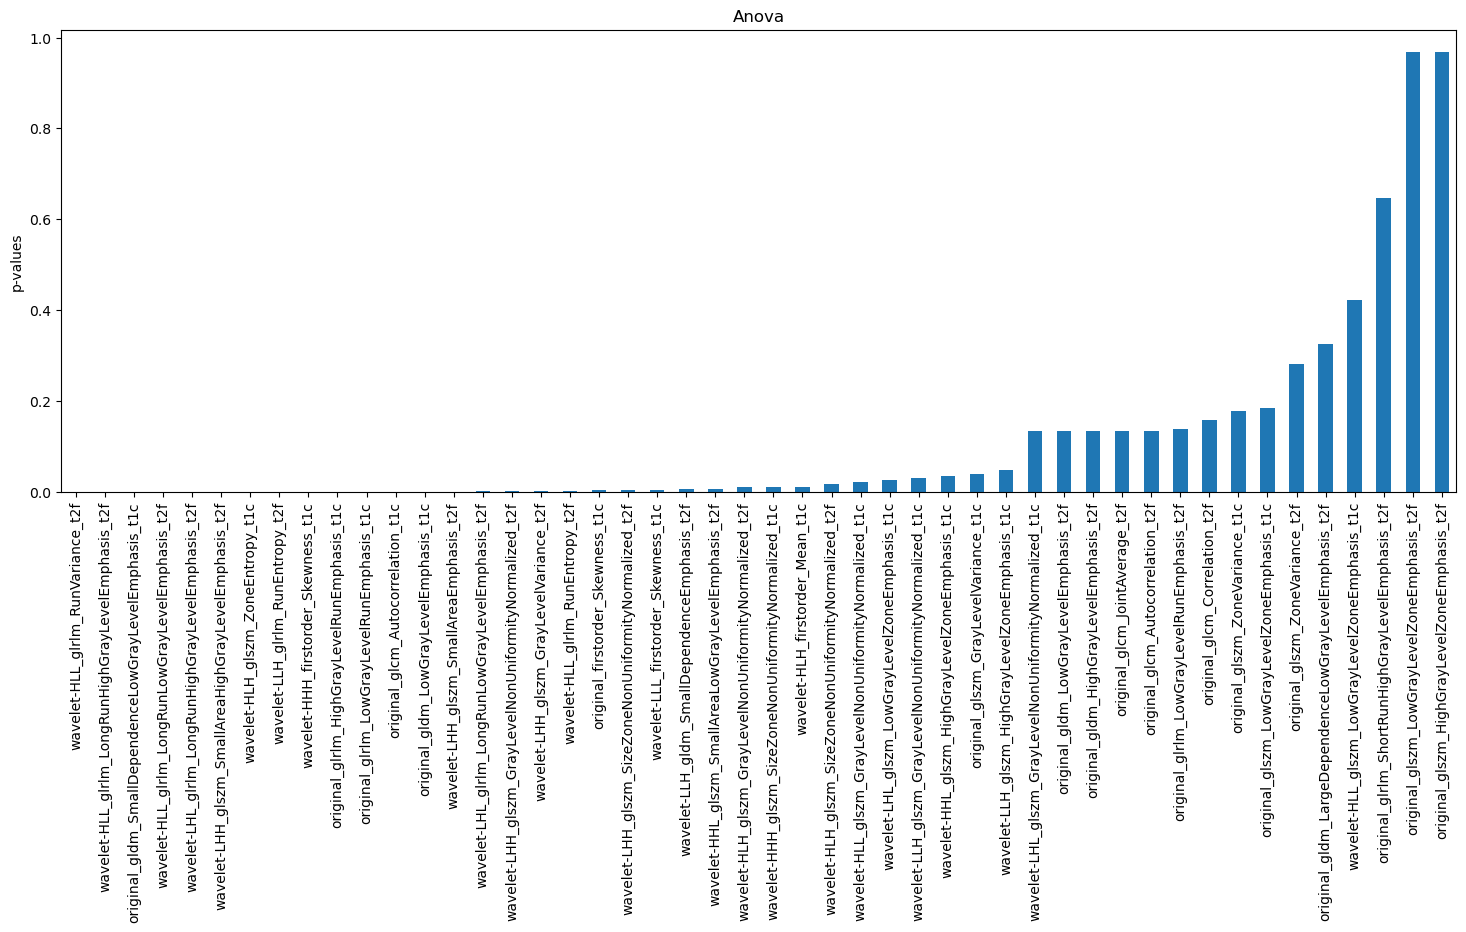

In [18]:
# select the input and target columns
X = df_scaled # we use the standardized features as our input
y = data["Grade"]

# perform one-way ANOVA for all the features:
univariate = f_classif(X, y)

# capture the p-values in a pandas series
univariate = pd.Series(univariate[1])
univariate.index = X.columns # add the variable names in the index

# sort the features based on their p-values, and make a bar plot
univariate.sort_values(ascending=True).plot.bar(figsize=(18, 6), rot=90) 
plt.ylabel("p-values")
plt.title("Anova");

In the above plot, we see that some features have p-values smaller than 0.05. For those features, we conclude that the mean value of the features between grade I and grade II meningioma is not the same. There are some other features whose p-value is bigger than 0.05, which means that their mean value is similar for grade I and grade II meningioma.

Next, we will use one-way ANOVA and select features whose p-value is bigger than 0.05.

In [19]:
# select features with p > 0.05
sel_feats = SelectFpr(f_classif, alpha=0.05).fit(X, y)

# get the list of the selected features
X.columns[sel_feats.get_support()]

Index(['original_firstorder_Skewness_t1c',
       'original_glrlm_HighGrayLevelRunEmphasis_t1c',
       'wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLH_firstorder_Mean_t1c', 'wavelet-HLH_glszm_ZoneEntropy_t1c',
       'wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c',
       'wavelet-HHH_firstorder_Skewness_t1c',
       'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c',
       'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f',
       'wavelet-HLL_glrlm_RunVariance_t2f',
       'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis_t2f',
       'wavelet-LLL_firstorder_Skewness_t1c',
       'original_glrlm_LowGrayLevelRunEmphasis_t1c',


From the output above, there are 33 significant features out of the 48 present in the dataset. 

However, we can also select the top 10 features to train our classification models.

In [20]:
# select best 10 features 
sel_10_feats = SelectKBest(f_classif, k=10).fit(X, y)

# get the list of the selected features
X.columns[sel_10_feats.get_support()]

Index(['original_glrlm_HighGrayLevelRunEmphasis_t1c',
       'wavelet-HLH_glszm_ZoneEntropy_t1c',
       'wavelet-HHH_firstorder_Skewness_t1c',
       'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f',
       'wavelet-HLL_glrlm_RunVariance_t2f',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c',
       'wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f',
       'wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f',
       'wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f',
       'wavelet-LLH_glrlm_RunEntropy_t2f'],
      dtype='object')

### Wrapper Method - Forward feature selection

- Forward feature selection, FFS is a sequential method. Here, we start with a single variable and keep adding more to get the best performance.
- Forward feature selection has the advantage that, by starting with smaller feature subsets, it is more computationally efficient than other wrapper methods.
- An important step in the forward feature selection is to define a stopping criteria. The most obvious stopping condition is when the performance of the classifier model does not improve beyond a certain threshold

In [21]:
# implementation of FFS with sklearn

from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

# let us use a Random forest classifier to train models and a three-fold cross validation to avoid overfitting
sfs = SFS(
    estimator=RandomForestClassifier(n_estimators=5, random_state=0),
    n_features_to_select='auto',
    tol=0.001, # define the threshold at which the search will stop
    direction='forward',
    scoring='roc_auc', # metric for evaluation is ROC-AUC
    cv=3,
)
sfs = sfs.fit(X, y)

In [22]:
# we can print out the names of the selected variables

sfs.get_feature_names_out()

array(['wavelet-HHH_firstorder_Skewness_t1c',
       'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-LHL_glszm_LowGrayLevelZoneEmphasis_t1c',
       'original_glszm_ZoneVariance_t2f',
       'wavelet-LHH_glszm_SmallAreaEmphasis_t2f'], dtype=object)

Using FFS wrapper method, the combination of the above five features gave the best performance. However, selecting 5 features out of 48 is not ideal for the classification model. Therefore, we will be choosing the filter method, ANOVA used above as our method for feature selection.

Furthermore, we will like to determine if the 5 features output from the wrapper method are found in the filter method

In [23]:
# checking for common features in both lists

wrapper_feats = list(sfs.get_feature_names_out()) # features selected via wrapper method
filter_feats = list(X.columns[sel_feats.get_support()]) # features selected via filter method

for feat in wrapper_feats:
    if feat in filter_feats:
        print(feat)

wavelet-HHH_firstorder_Skewness_t1c
wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f
wavelet-LHL_glszm_LowGrayLevelZoneEmphasis_t1c
wavelet-LHH_glszm_SmallAreaEmphasis_t2f


As seen from the output, 4 out of the 5 selected feature in the wrapper method are also present in selected features of the filter method.

<a id='model_train'></a>
## Model Training and Evaluation

### Train-test Split

- The dataset will be divided into 80% training set and 20% testing set.
- We first train our model on the training set, and then we use the data from the testing set to gauge the accuracy of the resulting model. 

In [24]:
# select data using only the selected features from filter method

X_input = df_scaled[filter_feats]
y = data["Grade"]

X_input.shape

(94, 33)

Our data now contain 33 variables/features instead of initial 48

In [25]:
# splitting dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_input, y, test_size=0.20, random_state=42)

In [26]:
# checking the train and test data shape

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(75, 33)
(19, 33)
(75,)
(19,)


### Classification Models

#### 1. Support Vector Machine (SVM)

In [27]:
# import the SVM classifier library
from sklearn.svm import SVC

# create an instance of the SVM classifier and fit it on the training set
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

# use the train model to predict the testing set
svm_pred = svm_clf.predict(X_test)

# determine the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, svm_pred)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.7894736842105263


#### Confusion Matrix for the SVM Classifier


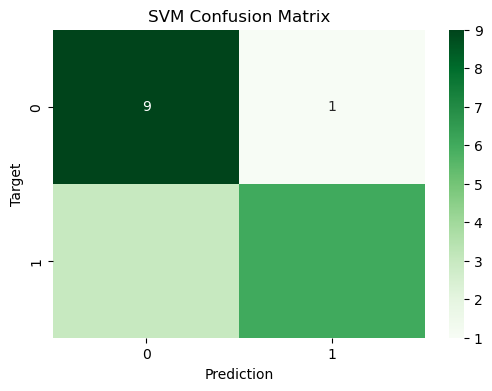

In [28]:
from sklearn.metrics import confusion_matrix

svm_cf = confusion_matrix(y_test, svm_pred) # create an instance of the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(svm_cf, cmap="Greens", annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('SVM Confusion Matrix');

#### Evaluation of the SVM Classifier

The model will be evaluated in terms of accuracy, sensitivity, specificity, precision, recall and AUC.

In [29]:
# obtain true and false positive and negative data point

TP = svm_cf[1,1] # true positive
TN = svm_cf[0,0] # true negative
FP = svm_cf[1,0] # False positive
FN = svm_cf[0,1] # false negative

# determine the evaluation metrics

svm_accuracy = (TP+TN)/(TP+TN+FN+FP)
svm_sensitivity = TP / (TP + FN)
svm_specificity = TN / (TN + FP)
svm_precision = TP / (TP + FP)
svm_recall = TP / (TP + FN)

'''Calculate AUC'''

#use model to predict probability that given y value is 1
pred_proba = svm_clf.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
svm_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
svm_metrics = [{'Accuracy': svm_accuracy, 'Sensitivity': svm_sensitivity, 'Specificity': svm_specificity,
                  'Precision': svm_precision, 'Recall': svm_recall, 'AUC': svm_auc}]
svm_metrics_df = pd.DataFrame.from_dict(svm_metrics) # convert the dictionary to dataframe
svm_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.789474,0.857143,0.75,0.666667,0.857143,0.866667


### 2. Logistic Regression 

In [30]:
# import logistic regression classifier

from sklearn.linear_model import LogisticRegression

# train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict on the test data
log_pred = log_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, log_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8947368421052632


#### Confusion Matrix for Logistic Regression Model

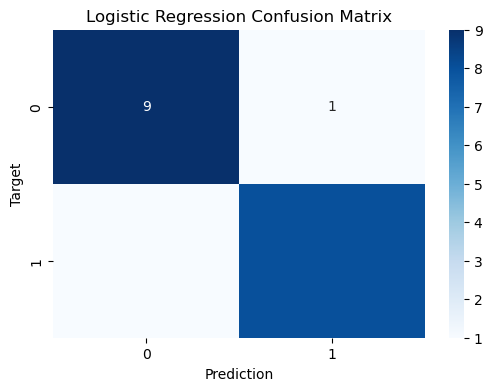

In [31]:
log_cf = confusion_matrix(y_test, log_pred) # create an instance of the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(log_cf, cmap="Blues", annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Logistic Regression Confusion Matrix');

#### Evaluation of the Logistic Regression Classifier

The model will be evaluated in terms of accuracy, sensitivity, specificity, precision, recall and AUC.

In [32]:
# obtain true and false positive and negative data point

TP = log_cf[1,1] # true positive
TN = log_cf[0,0] # true negative
FP = log_cf[1,0] # False positive
FN = log_cf[0,1] # false negative

# determine the evaluation metrics

log_accuracy = (TP+TN)/(TP+TN+FN+FP)
log_sensitivity = TP / (TP + FN)
log_specificity = TN / (TN + FP)
log_precision = TP / (TP + FP)
log_recall = TP / (TP + FN)

'''Calculate AUC'''

#use model to predict probability that given y value is 1
pred_proba = log_model.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
log_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
log_metrics = [{'Accuracy': log_accuracy, 'Sensitivity': log_sensitivity, 'Specificity': log_specificity,
                  'Precision': log_precision, 'Recall': log_recall, 'AUC': log_auc}]
log_metrics_df = pd.DataFrame.from_dict(log_metrics) # convert the dictionary to dataframe
log_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.894737,0.888889,0.9,0.888889,0.888889,0.933333


### 3. Random Forest Classifier (RFC)

In [33]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

# Predict on the test data
rfc_pred = rfc_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7894736842105263


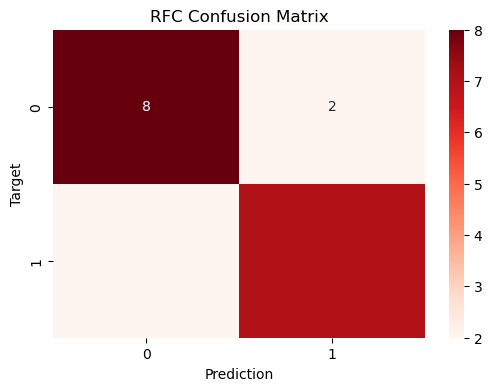

In [34]:
# Confusion Matrix for RFC

rfc_cf = confusion_matrix(y_test, rfc_pred) # create an instance of the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(rfc_cf, cmap="Reds", annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('RFC Confusion Matrix');

#### Evaluation of the Random Forest Classifier

The model will be evaluated in terms of accuracy, sensitivity, specificity, precision, recall and AUC.

In [35]:
# obtain true and false positive and negative data point

TP = rfc_cf[1,1] # true positive
TN = rfc_cf[0,0] # true negative
FP = rfc_cf[1,0] # False positive
FN = rfc_cf[0,1] # false negative

# determine the evaluation metrics

rfc_accuracy = (TP+TN)/(TP+TN+FN+FP)
rfc_sensitivity = TP / (TP + FN)
rfc_specificity = TN / (TN + FP)
rfc_precision = TP / (TP + FP)
rfc_recall = TP / (TP + FN)

'''Calculate AUC'''

#use model to predict probability that given y value is 1
pred_proba = rfc_model.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
rfc_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
rfc_metrics = [{'Accuracy': rfc_accuracy, 'Sensitivity': rfc_sensitivity, 'Specificity': rfc_specificity,
                  'Precision': rfc_precision, 'Recall': rfc_recall, 'AUC': rfc_auc}]
rfc_metrics_df = pd.DataFrame.from_dict(rfc_metrics) # convert the dictionary to dataframe
rfc_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.789474,0.777778,0.8,0.777778,0.777778,0.883333


<a id='model_imp'></a>

## Hyperparameter Tuning

Hyperparameters are some set of parameters that are used to control the behaviour of the model/algorithm and adjustable in order to obtain an improvised model with optimal performance

#### Tuning of SVM hyperparameters

- Hyperparameter tuning for a Support Vector Machine (SVM) classifier involves finding the optimal values for parameters such as the choice of kernel, regularization parameter (C), and kernel coefficients (gamma).
- We can perform hyperparameter tuning using techniques like grid search or random search. In our case, we will use grid search techniques

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.01, 0.1, 1, 10], 
              'kernel': ['linear', 'rbf', 'poly']}

# Initialize the SVM classifier
svm = SVC()

# Perform grid search with three-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize SVM with best hyperparameters
best_svm = SVC(**best_params)

# Train the SVM with best hyperparameters on the entire training set
best_svm.fit(X_train, y_train)

# Predict on the test data
y_pred = best_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

Best Hyperparameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

Accuracy: 0.8421052631578947


- We can see that the best hyperparameters for the SVM classifiers are C=1, gamma=0.01, and kernel= rbf (radial basis function).
- Combining the hyperparameters, the accuracy of the SVM classifier has been improved from **78.94% to 84.21%.**

#### Tuning of Logistic Regression hyperparameters

For logistic regression, some common hyperparameters include regularization strength (C), penalty type (L1 or L2), and solver type.

In [37]:
import warnings
warnings.filterwarnings('ignore')

# Define hyperparameters to search using grid search techniques
param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga', 'lbfgs']  # Solver type
}

# Initialize logistic regression classifier
lr = LogisticRegression()

# Initialize GridSearchCV with 3-fold cross validation
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the test data with the best model
best_logmodel = grid_search.best_estimator_
y_pred = best_logmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.8947368421052632


It was observed that the accuracy score for logistic regression remains 89.47% even after hyperparameter tuning.

#### Tuning of Random Forest Classifier Hyperparameters

In [38]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Predict on the test data using the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}

Accuracy: 0.8421052631578947


By tuning the hyperparameter of the random forest classifier using grid search techniques, the accuracy of the model has been improved from **78.94% to 84.21%.**

<a id='model_reeval'></a>

## Model Re-evaluation

We will re-evaluate the tuned model in terms of accuracy, sensitivity, specificity, precision, recall and AUC.

#### Support Vector Machine



In [39]:
# Predict on the test data
svm_tune_pred = best_svm.predict(X_test)

# Confusion Matrix for tuned SVM
svm_cf = confusion_matrix(y_test, svm_tune_pred)

# obtain true and false positive and negative data point

TP = svm_cf[1,1] # true positive
TN = svm_cf[0,0] # true negative
FP = svm_cf[1,0] # False positive
FN = svm_cf[0,1] # false negative

# determine the evaluation metrics

svm_accuracy = (TP+TN)/(TP+TN+FN+FP)
svm_sensitivity = TP / (TP + FN)
svm_specificity = TN / (TN + FP)
svm_precision = TP / (TP + FP)
svm_recall = TP / (TP + FN)

'''Calculate AUC'''

#use model to predict probability that given y value is 1
pred_proba = svm_clf.predict_proba(X_test)[::,1]

#calculate AUC of model
svm_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
svm_metrics = [{'Accuracy': svm_accuracy, 'Sensitivity': svm_sensitivity, 'Specificity': svm_specificity,
                  'Precision': svm_precision, 'Recall': svm_recall, 'AUC': svm_auc}]
svm_metrics_df = pd.DataFrame.from_dict(svm_metrics) # convert the dictionary to dataframe
svm_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.842105,0.875,0.818182,0.777778,0.875,0.866667


It was evident from the output of the tuned SVM model evaluation that the model performance have been greatly improved.

#### Logistic Regression

In [40]:
# Predict on the test data
log_tune_pred = best_logmodel.predict(X_test)

# Confusion Matrix for tuned SVM
log_cf = confusion_matrix(y_test, log_tune_pred)

# obtain true and false positive and negative data point

TP = log_cf[1,1] # true positive
TN = log_cf[0,0] # true negative
FP = log_cf[1,0] # False positive
FN = log_cf[0,1] # false negative

# determine the evaluation metrics

log_accuracy = (TP+TN)/(TP+TN+FN+FP)
log_sensitivity = TP / (TP + FN)
log_specificity = TN / (TN + FP)
log_precision = TP / (TP + FP)
log_recall = TP / (TP + FN)

'''Calculate AUC'''

#use model to predict probability that given y value is 1
pred_proba = log_model.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
log_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
log_metrics = [{'Accuracy': log_accuracy, 'Sensitivity': log_sensitivity, 'Specificity': log_specificity,
                  'Precision': log_precision, 'Recall': log_recall, 'AUC': log_auc}]
log_metrics_df = pd.DataFrame.from_dict(log_metrics) # convert the dictionary to dataframe
log_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.894737,0.888889,0.9,0.888889,0.888889,0.933333


#### Random Forest Classifier

In [41]:
# Predict on the test data
rfc_tune_pred = best_rf_model.predict(X_test)

# Confusion Matrix for tuned SVM
rfc_cf = confusion_matrix(y_test, rfc_tune_pred)

# obtain true and false positive and negative data point

TP = rfc_cf[1,1] # true positive
TN = rfc_cf[0,0] # true negative
FP = rfc_cf[1,0] # False positive
FN = rfc_cf[0,1] # false negative

# determine the evaluation metrics

rfc_accuracy = (TP+TN)/(TP+TN+FN+FP)
rfc_sensitivity = TP / (TP + FN)
rfc_specificity = TN / (TN + FP)
rfc_precision = TP / (TP + FP)
rfc_recall = TP / (TP + FN)

'''Calculate AUC'''

#use model to predict probability that given y value is 1
pred_proba = rfc_model.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
rfc_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
rfc_metrics = [{'Accuracy': rfc_accuracy, 'Sensitivity': rfc_sensitivity, 'Specificity': rfc_specificity,
                  'Precision': rfc_precision, 'Recall': rfc_recall, 'AUC': rfc_auc}]
rfc_metrics_df = pd.DataFrame.from_dict(rfc_metrics) # convert the dictionary to dataframe
rfc_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.842105,0.8,0.888889,0.888889,0.8,0.883333


The performance metrics obtained from the tuned random forest model have beeen greatly improved as compared to the initial random forest model.

<a id='model_comp'></a>

## Comparing Models Performance

In [42]:
model_perf = {'Classifiers': ['Support Vector Machine', 'Logistic Regression', 'Random Forest Classifier'], 
              'Accuracy': [svm_accuracy, log_accuracy, rfc_accuracy],
              'Sensitivity': [svm_sensitivity, log_sensitivity, rfc_sensitivity],
              'Specificity': [svm_specificity, log_specificity, rfc_specificity],
              'Precision': [svm_precision, log_precision, rfc_precision],
              'Recall': [svm_recall, log_recall, rfc_recall], 
              'AUC': [svm_auc, log_auc, rfc_auc]}

# convert the model_perf dictionary to dataframe
model_perf_df = pd.DataFrame.from_dict(model_perf)
model_perf_df

,Classifiers,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,Support Vector Machine,0.842105,0.875000,0.818182,0.777778,0.875000,0.866667
1,Logistic Regression,0.894737,0.888889,0.900000,0.888889,0.888889,0.933333
2,Random Forest Classifier,0.842105,0.800000,0.888889,0.888889,0.800000,0.883333


## Conclusion

- We have been able to utilise machine learning to predict the grade of meningioma based on radiomics features.
- Three classification models; SVM, logistic regression, and random forest classifiers were developed.
- Of the three models, logistic regression model gives the best performance in terms of the metrics evaluated.